In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.figure_factory as ff
import seaborn as sns

dataset = pd.read_csv("C:\\Users\\Dell\\Desktop\\projet_final\\heart_failure_clinical_records_dataset.csv")
print("Number of entries = " + str(len(dataset)))
dataset.head()

Number of entries = 299


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


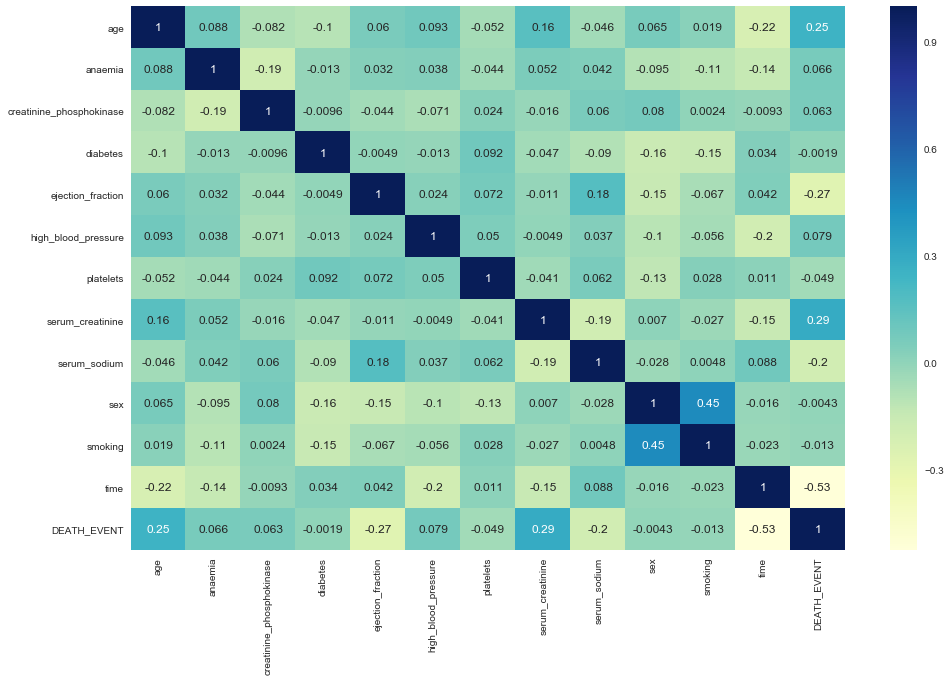

In [73]:
columns = list(dataset.columns)
print(*columns, sep='\n')
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(method='pearson'), annot=True, cmap="YlGnBu")

In [9]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)
from sklearn.metrics import confusion_matrix, accuracy_score

algo_accuracy_record = []  # each element is list of format - ['algo_name', algo_max_accuracy]

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_acc = []
rf_cm = []

for num_trees in range(1, 200):
    rf_classifier = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_pred = rf_classifier.predict(x_test)

    rf_acc.append(accuracy_score(y_test,rf_pred))
    rf_cm.append(confusion_matrix(y_test,rf_pred))
    
max_acc = max(rf_acc)
max_acc_cm = rf_cm[rf_acc.index(max_acc)]
print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['RandomForestClassifier', max_acc])


D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


maximum accuracy = 0.95
confusion matrix = 
[[43  0]
 [ 3 14]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
fit = rf_classifier.fit(x_train, y_train)
# ROC
y_score = rf_classifier.fit(x_train, y_train).predict_proba(x_test)  # 随机森林
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:, 1])
roc_auc = metrics.auc(fpr, tpr)

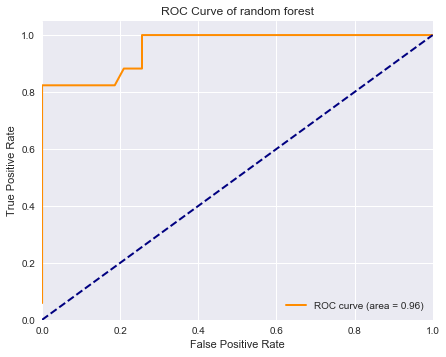

In [15]:
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of random forest')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc,fpr,tpr)

[[1.   0.  ]
 [0.18 0.82]]


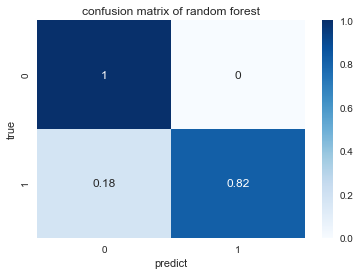

In [14]:
def plot(matrix):
  sns.set()
  f,ax=plt.subplots()
  matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  
  matrix = np.around(matrix, decimals=2)
  print(matrix) 
  sns.heatmap(matrix,annot=True,cmap="Blues",ax=ax) #画热力图
  ax.set_title('confusion matrix of random forest') #标题
  ax.set_xlabel('predict') #x轴
  ax.set_ylabel('true') #y轴
plot(max_acc_cm)

In [97]:
estimator = rf_classifier.estimators_[5]
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.tree import export_graphviz
# 导出为dot 文件
export_graphviz(estimator, out_file='tree.dot', 
                #feature_names = iris.feature_names,
                feature_names = ["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction","high_blood_pressure",
                                 "platelets","serum_creatinine","serum_sodium","sex	smoking","time","DEATH_EVENT"],
                #class_names = iris.target_names,
                class_names = ["0", "1"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# 用系统命令转为PNG文件(需要 Graphviz)
from subprocess import call
call(['dot', '-Tpng', "C:\\Users\\Dell\\Desktop\\projet_final\\tree.dot", '-o', 'tree.png', '-Gdpi=600'])

# 在jupyter notebook中展示
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] 系统找不到指定的文件。

Text(0.5,0,'Relative Importance')

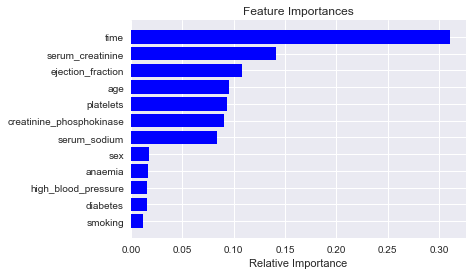

In [98]:
features=dataset.columns[[0,1,2,3,4,5,6,7,8,9,10,11]]
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_acc = []
dt_cm = []

dt_classifier = DecisionTreeClassifier(criterion = 'entropy')
for i in range(20):
    dt_classifier.fit(x_train[:,[3,4,7,11]], y_train)
    dt_pred = dt_classifier.predict(x_test[:,[3,4,7,11]])

    dt_acc.append(accuracy_score(y_test, dt_pred))
    dt_cm.append(confusion_matrix(y_test, dt_pred))
    
max_acc = max(dt_acc)
max_acc_cm = dt_cm[dt_acc.index(max_acc)]

print('maximum accuracy = ' + str(max_acc))
print('confusion matrix = ')
print(max_acc_cm)
algo_accuracy_record.append(['DecisionTreeClassifier', max_acc])

maximum accuracy = 0.8166666666666667
confusion matrix = 
[[37  6]
 [ 5 12]]


[[0.86 0.14]
 [0.29 0.71]]


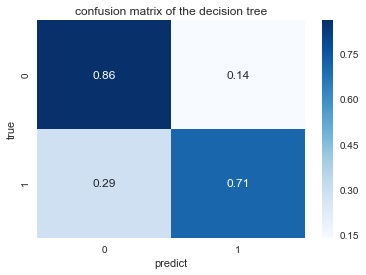

In [6]:
def plot(matrix):
  sns.set()
  f,ax=plt.subplots()
  matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  
  matrix = np.around(matrix, decimals=2)
  print(matrix) 
  sns.heatmap(matrix,annot=True,cmap="Blues",ax=ax) #画热力图
  ax.set_title('confusion matrix of the decision tree') #标题
  ax.set_xlabel('predict') #x轴
  ax.set_ylabel('true') #y轴

plot(max_acc_cm)